The following modules define the RK4 process and solves the LEE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy
import pdb

#constants
rsol = 6.957e10 #CGS
msol = 1.989e33 #CGS
lsol = 3.8e33   #cgs

G = 6.67e-8 #CGS
e_charge = 4.8e-10 #CGS electron charge
kb = 1.38e-16 #CGS boltzman constant
Na = 6.02e23 #advagadros number
amu = 1.66e-24 #g atomic mass unit
h = 6.63e-27  #planks constant cgs
me = 9.1e-28 #electron mass grams
c = 3e10 # speed of light CGS
a = 7.56e-15 #CGS radiation constant
R = 8.31e7 #gas constant CGS

In [2]:
# dU/dZeta function
def f_u(zeta, u, theta):
    if zeta == 0:
        return -1/3 #initial condition
    return -2*u/zeta - theta**n
# dTheta/dZeta == u
def f_theta(zeta, u, theta):
    return u
# simple test function
def y_func(x,y,th):
    return y

In [3]:
def RK4(f, zeta0, u0, theta0, var):
    zeta = zeta0 + h
    if var == 'u':
        k1 = f(zeta0, u0, theta0)
        k2 = f((zeta0+h/2), (u0+h*k1/2), theta0)
        k3 = f((zeta0+h/2), (u0+h*k2/2), theta0)
        k4 = f((zeta0+h), (u0+h*k3), theta0)
        k = (k1+2*k2+2*k3+k4)*h/6
        u = u0 + k
        return zeta, u
    elif var == 'theta':
        k1 = f(zeta0, u0, theta0)
        k2 = f((zeta0+h/2), (u0), theta0 +h*k1/2)
        k3 = f((zeta0+h/2), (u0), theta0 +h*k2/2)
        k4 = f((zeta0+h), (u0), theta0+h*k3)
        k = (k1+2*k2+2*k3+k4)*h/6
        theta = theta0 + k
        return zeta, theta
    else:
        print("WARNING")

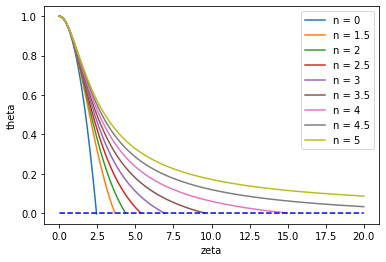

In [50]:
#step size
h = 0.01
#polytrope index
n = 1.5
#number of steps
n_steps = 2000

#n_list = [0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
#looping over all polytropes can make a list.


for n in [0,1.5,2,2.5,3,3.5,4,4.5,5]:
# initial conditions
    zeta = 0.0
    theta = 1.0
    u = 0.0
    theta_sol = []
    zeta_sol = []
    u_sol = []
    for i in range(n_steps):
        if theta < 0: #zeta_1 values
            break # we are only interesting in realistic solutions
        zeta_tmp, u = RK4(f_u,zeta, u, theta, 'u')
        zeta, theta = RK4(f_theta,zeta, u, theta, 'theta')
        zeta = zeta_tmp
        u_sol.append(u)
        theta_sol.append(theta)
        zeta_sol.append(zeta)
#     plt.plot(zeta_sol,u_sol, label = 'u')
    plt.plot(zeta_sol,theta_sol, label = 'n = '+ str(n))
# print('zeta1',zeta_sol[-1], 'u1', u_sol[-1])


plt.plot(zeta_sol, [0 for n in range(len(zeta_sol))], linestyle = '--', color = 'b')
plt.xlabel('zeta')
plt.ylabel('theta')
plt.legend()
plt.show()

The following code is for question 2a)

In [ ]:
get the temp funciton
rho_c = sympy.Symbol('rho_c')#g/cm3
T = sympy.Symbol('T')
kb = sympy.Symbol('kb')
rho = sympy.Symbol('rho')
rad_constant = sympy.Symbol('rad_constant')
mu = sympy.Symbol('mu')
amu = sympy.Symbol('amu')
P = sympy.Symbol('P')
T_sol = sympy.solve(kb*rho*T/(mu*amu) + (a/3)*T**4 - P, T)
print(T_sol)
# it was the second peicewise


In [5]:
def temperature(P, rho):
    return -np.sqrt(-2*P/(a*(9*R**2*rho**2/(16*a**2*mu**2) \
    + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3)) \
    + 2*(9*R**2*rho**2/(16*a**2*mu**2) + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3))/2 \
    + np.sqrt(2*P/(a*(9*R**2*rho**2/(16*a**2*mu**2) + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3)) \
    + 6*R*rho/(a*mu*np.sqrt(-2*P/(a*(9*R**2*rho**2/(16*a**2*mu**2) + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3)) \
    + 2*(9*R**2*rho**2/(16*a**2*mu**2) + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3))) \
    - 2*(9*R**2*rho**2/(16*a**2*mu**2) + np.sqrt(P**3/a**3 + 81*R**4*rho**4/(256*a**4*mu**4)))**(1/3))/2

In [57]:
X1 = 0.715 #mass fraction of H
mu = 0.61 #mean molecular weight

#step size
h = 0.01
#polytrope index
n = 1.5
#number of steps
n_steps = 2000

zeta = 0.0
theta = 1.0
u = 0.0
theta_sol = []
zeta_sol = []
u_sol = []
for i in range(n_steps):
    if theta < 0: #zeta_1 values
        break # we are only interesting in realistic solutions
    zeta_tmp, u = RK4(f_u,zeta, u, theta, 'u')
    zeta, theta = RK4(f_theta,zeta, u, theta, 'theta')
    zeta = zeta_tmp
    u_sol.append(u)
    theta_sol.append(theta)
    zeta_sol.append(zeta)
    
#discard negative solution
print(theta_sol[-1])
zeta_sol = np.array(zeta_sol[:-1])
theta_sol = np.array(theta_sol[:-1])
u_sol = np.array(u_sol[:-1])
zeta1 = zeta_sol[-1]
u1 = u_sol[-1]
print(theta_sol[-1])

-0.00025690791719469586
0.0017802719863788162


In [52]:
print('T = ',temperature(4.4e17,160)*10**-7, '10^7 K')
#check the funtion works 

T =  2.016739694039279 10^7 K


In [93]:
#loop over possible central densities to find reasonable answer
for rho_c in np.linspace(45,55,100): #reasonable guess
    print(rho_c)
    alpha = (msol/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
    K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
    rho = rho_c*theta_sol**n
    P = K*rho**(1+1/n)
    M = -4 * np.pi * alpha**3 * rho_c * np.power(zeta_sol,2) * u_sol
    luminosity = 0
    T_9 = temperature(P,rho)*10**(-9)
#     print('T_9_c =',T_9[0])
#     print('P =', P[0])
#     print('rho =', rho[0])
#     print('M =', M[-1])
#     print('M_tot = ', np.sum(M))
#     print('K =', K)
#     print('alpha = ', alpha)
    for i in range(len(rho)):
        if i ==0:
            dm = M[i]
        else:
            dm = M[i]-M[i-1]
        T_9 = temperature(P[i],rho[i])*10**(-9)
        g11 = 1 + 3.82*T_9 +1.51*T_9**2 + 0.144*T_9**3 -0.0144*T_9**4
        epp = 5.14e4 * g11 * rho[i] * X1**2 * T_9**(-2/3) *np.exp(-3.381/(T_9**(1/3)))
        luminosity += epp*dm
    print('luminocity = ', luminosity)   
    if (lsol-lsol/100 < luminosity < lsol + lsol/100):
        print('this value of rho_c gives is accurate within +/-1%', rho_c)
        print('luminosity = ', luminosity)
        
#values of rho_c ~ 49.5 gives the required luminosity        

4.18e+33
45.0
luminocity =  3.010286885855511e+33
45.101010101010104
luminocity =  3.0271414341133815e+33
45.2020202020202
luminocity =  3.0440496304298757e+33
45.303030303030305
luminocity =  3.0610115103938167e+33
45.4040404040404
luminocity =  3.078027109491548e+33
45.505050505050505
luminocity =  3.0950964631074303e+33
45.60606060606061
luminocity =  3.112219606524262e+33
45.707070707070706
luminocity =  3.129396574923734e+33
45.80808080808081
luminocity =  3.146627403386861e+33
45.90909090909091
luminocity =  3.163912126894408e+33
46.01010101010101
luminocity =  3.181250780327312e+33
46.111111111111114
luminocity =  3.1986433984671265e+33
46.21212121212121
luminocity =  3.216090015996466e+33
46.313131313131315
luminocity =  3.233590667499366e+33
46.41414141414141
luminocity =  3.2511453874617816e+33
46.515151515151516
luminocity =  3.268754210271942e+33
46.61616161616162
luminocity =  3.286417170220797e+33
46.717171717171716
luminocity =  3.3041343015024295e+33
46.81818181818182
l

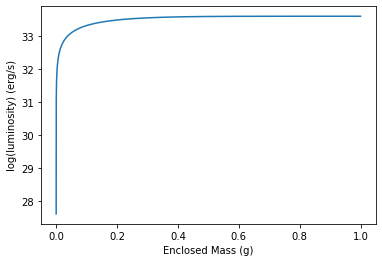

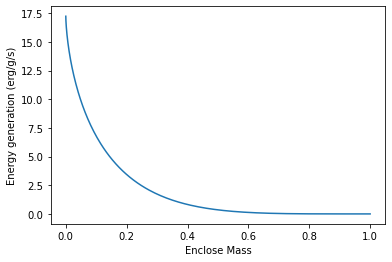

Radius of this star is  0.5507567731973254 rsol


In [67]:
rho_c = 50 #that was determined really 49.5 but who is counting? 

l_list = []
epp_list = []
mass_coor_list = []

alpha = (msol/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
rho = rho_c*theta_sol**n
P = K*rho**(1+1/n)
M = -4 * np.pi * alpha**3 * rho_c * np.power(zeta_sol,2) * u_sol
luminosity = 0
T_9 = temperature(P,rho)*10**(-9)
#     print('T_9_c =',T_9[0])
#     print('P =', P[0])
#     print('rho =', rho[0])
#     print('M =', M[-1])
#     print('M_tot = ', np.sum(M))
#     print('K =', K)
#     print('alpha = ', alpha)
for i in range(len(rho)):
    if i ==0:
        dm = M[i]
    else:
        dm = M[i]-M[i-1]
    T_9 = temperature(P[i],rho[i])*10**(-9)
    g11 = 1 + 3.82*T_9 +1.51*T_9**2 + 0.144*T_9**3 -0.0144*T_9**4
    epp = 5.14e4 * g11 * rho[i] * X1**2 * T_9**(-2/3) *np.exp(-3.381/(T_9**(1/3)))
    luminosity += epp*dm
    epp_list.append(epp)
    l_list.append(luminosity)


epp_list = np.array(epp_list)
l_list = np.array(l_list)
plt.plot(M/msol,np.log10(l_list), label = 'luminosity')
plt.xlabel('Enclosed Mass (g)')
plt.ylabel('log(luminosity) (erg/s)')
plt.show()
plt.plot(M/msol, epp_list, label = 'energy generation')
plt.xlabel('Enclose Mass')
plt.ylabel('Energy generation (erg/g/s)')
plt.show()

print('Radius of this star is ', alpha*zeta1/rsol, 'rsol')

Code below is for question 2b) 

In [38]:
#step size
h = 0.01
#polytrope index
n = 3.0
#number of steps
n_steps = 2000

#n_list = [0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
#looping over all polytropes can make a list.


# for n in [0,1.5,2,2.5,3,3.5,4,4.5,5]:
#initial conditions
zeta = 0.0
theta = 1.0
u = 0.0
theta_sol = []
zeta_sol = []
u_sol = []
for i in range(n_steps):
    if theta < 0: #zeta_1 values
        break # we are only interesting in realistic solutions
    zeta_tmp, u = RK4(f_u,zeta, u, theta, 'u')
    zeta, theta = RK4(f_theta,zeta, u, theta, 'theta')
    zeta = zeta_tmp
    u_sol.append(u)
    theta_sol.append(theta)
    zeta_sol.append(zeta)
    
print(theta_sol[-1])
zeta_sol = np.array(zeta_sol[:-1],dtype = float)
theta_sol = np.array(theta_sol[:-1],dtype = float)
u_sol = np.array(u_sol[:-1],dtype = float)
zeta1 = zeta_sol[-1]
u1 = u_sol[-1]
mu = 0.61
print(theta_sol[-1]) 
print(zeta1)
print(u1)

-0.00034481156450529536
7.909340565897925e-05
6.8899999999998975
-0.04251363565024241


In [39]:
## Solove for rho_c for a given T_c using the EOS 
# T_c (has values to use)
rho_c = sympy.symbols('rho_c', real = True)
mu = 0.61
m_star = 10**5 * msol
alpha = (m_star/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
P_c = K*rho_c**(1+1/n)
# expr = kb*rho_c*T_c/(mu*amu) + (a/3)*T_c**4 - P_c
print(a)

T_c = [2e7,2.5e7,3e7,3.5e7]
rho_c_list = []
for T_c in T_c:
    expr = sympy.Eq(kb*rho_c*T_c/(mu*amu) + (a/3)*T_c**4 - P_c, 0)
    print('T_c=',T_c)
    print('expr=',expr)
    rho_c_sol = float(sympy.solve(expr, rho_c)[0])
    rho_c_list.append(rho_c_sol)
    print('rho_c =',rho_c_sol)
rho_c_list = np.array(rho_c_list)    

7.56e-15
T_c= 20000000.0
expr= Eq(2.7256567252617e+15*rho_c - 8.2714413116921e+17*rho_c**2.0*(1/rho_c)**0.666666666666667 + 403200000000000.0, 0)
rho_c = 0.0033359404000243937
T_c= 25000000.0
expr= Eq(3.40707090657713e+15*rho_c - 8.2714413116921e+17*rho_c**2.0*(1/rho_c)**0.666666666666667 + 984375000000000.0, 0)
rho_c = 0.0065155085937976445
T_c= 30000000.0
expr= Eq(4.08848508789255e+15*rho_c - 8.2714413116921e+17*rho_c**2.0*(1/rho_c)**0.666666666666667 + 2.0412e+15, 0)
rho_c = 0.01125879885008233
T_c= 35000000.0
expr= Eq(4.76989926920798e+15*rho_c - 8.2714413116921e+17*rho_c**2.0*(1/rho_c)**0.666666666666667 + 3.781575e+15, 0)
rho_c = 0.017878555581380736


In [32]:
X1 = 0.715
Xcno = 0.014
mu = 0.61
m_star = 10**5 * msol


radius = []
l_list = []
for rho_c in rho_c_list:
    enclosed_mass = []
    rho = rho_c * theta_sol**n
    alpha = (m_star/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
    K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
    P = K*rho**(1+1/n)
    M = -4*np.pi*alpha**3*rho_c*np.power(zeta_sol,2)*u_sol
    luminosity = 0
    radius.append(alpha*zeta1/rsol)
    for i in range(len(theta_sol)):
        if i ==0:
            dm = M[i]
            enclosed_mass.append(M[i])
        else:
            dm = M[i]-M[i-1]
            enclosed_mass.append(enclosed_mass[i-1]+dm)
        T_9 = temperature(P[i], rho[i])*10**(-9)    
        g14 = 1 - 2.0*T_9 + 3.41*T_9**2 - 2.43*T_9**3
        ecno = 8.24e25 *g14 * Xcno*X1 * rho[i] * T_9**(-2/3) * np.exp(-15.231*T_9**(-1/3)-(T_9/0.8)**2)
        luminosity += ecno*dm
    l_list.append(luminosity)
    print('luminosity = ', luminosity/lsol, 'Lsol')
    print('Radius = ', alpha*zeta1/rsol, 'Rsol')
    
l_list = np.array(l_list)  
enclosed_mass = np.array(enclosed_mass)






luminosity =  22.097494995921718 Lsol
radius =  1316.8729208343386 Rsol
luminosity =  2251.6097727531023 Lsol
radius =  1053.498336667471 Rsol
luminosity =  79202.3195090114 Lsol
radius =  877.9152805562258 Rsol
luminosity =  1391839.6328846605 Lsol
radius =  752.4988119053363 Rsol


In [27]:
print(enclosed_mass[-1])
# looks good

1.9889999999999907e+38


The radius of the stellar models are: [1316.8729208343386, 1053.498336667471, 877.9152805562258, 752.4988119053363] R_sol
THe luminosity of the stellar models are: [2.20974950e+01 2.25160977e+03 7.92023195e+04 1.39183963e+06] L_sol
[0.00333594 0.00651551 0.0112588  0.01787856]


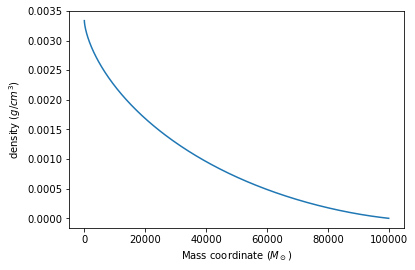

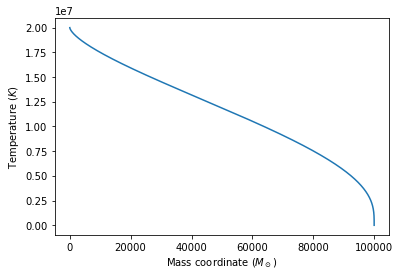

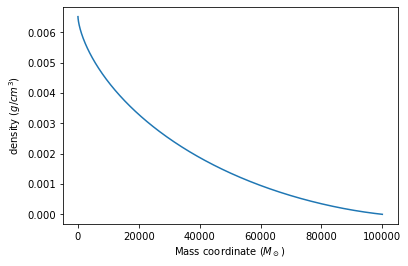

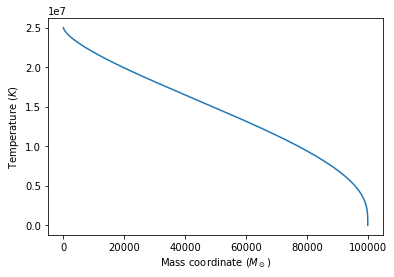

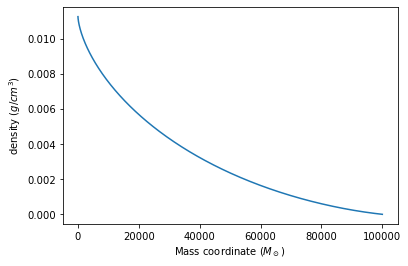

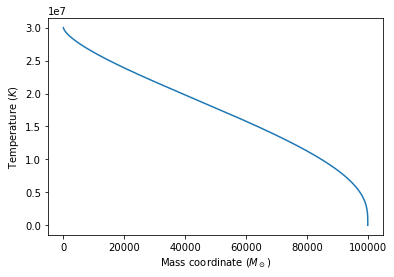

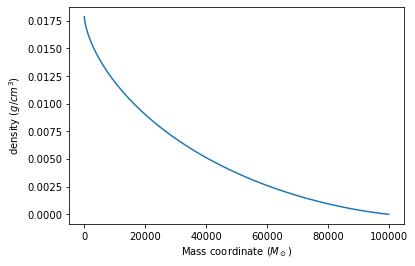

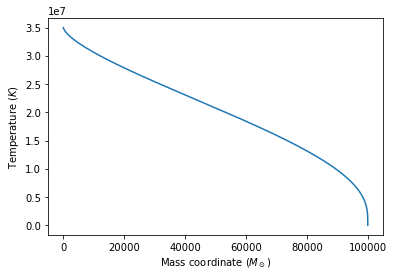

In [33]:
print('The radius of the stellar models are:',radius, 'R_sol')
print('THe luminosity of the stellar models are:', l_list/lsol, 'L_sol')
print(rho_c_list)
for rho_c in rho_c_list:
    rho = rho_c * theta_sol**n
    alpha = (m_star/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
    K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
    P = K*rho**(1+1/n)
    T = temperature(P,rho)
    plt.plot(enclosed_mass/msol, rho)
    plt.ylabel('density ($g/cm^{3}$)')
    plt.xlabel('Mass coordinate ($M_\odot$)')
    plt.show()
    plt.plot(enclosed_mass/msol, T)
    plt.ylabel('Temperature ($K$)')
    plt.xlabel('Mass coordinate ($M_\odot$)')
    plt.show()
    

In [37]:
P_g_center = R*rho[0]*T[0]/mu
central_P = R*rho[0]*T[0]/mu + a/3 * T[0]**4

beta = P_g_center/central_P

print(beta)

P_g = R*rho*T/mu
P = R*rho*T/mu + a/3 * T**4
beta_av = np.average(P_g/P)
print(beta_av)
# (its mostly supported by radiation pressure)

0.022045240962935267
0.022045240963006613


Solution for 2c) 

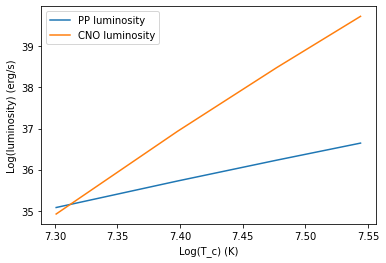

In [48]:
X1 = 0.715
Xcno = 0.014
mu = 0.61
m_star = 10**5 * msol
T_c = [2e7,2.5e7,3e7,3.5e7]

radius = []
lpp_list = []
lcno_list = []

for rho_c in rho_c_list:
    enclosed_mass = []
    rho = rho_c * theta_sol**n
    alpha = (m_star/(-4*np.pi*rho_c*u1*zeta1**2))**(1/3)
    K = ((alpha**2)*4*np.pi*G*rho_c**((n-1)/n))/(n+1)
    P = K*rho**(1+1/n)
    M = -4*np.pi*alpha**3*rho_c*np.power(zeta_sol,2)*u_sol
    luminosity_cno = 0
    luminosity_pp = 0
    radius.append(alpha*zeta1/rsol)
    for i in range(len(theta_sol)):
        if i ==0:
            dm = M[i]
            enclosed_mass.append(M[i])
        else:
            dm = M[i]-M[i-1]
            enclosed_mass.append(enclosed_mass[i-1]+dm)
        T_9 = temperature(P[i], rho[i])*10**(-9) 
        g11 = 1 + 3.82*T_9 +1.51*T_9**2 + 0.144*T_9**3 -0.0144*T_9**4
        epp = 5.14e4 * g11 * rho[i] * X1**2 * T_9**(-2/3) *np.exp(-3.381/(T_9**(1/3)))
        g14 = 1 - 2.0*T_9 + 3.41*T_9**2 - 2.43*T_9**3
        ecno = 8.24e25 *g14 * Xcno*X1 * rho[i] * T_9**(-2/3) * np.exp(-15.231*T_9**(-1/3)-(T_9/0.8)**2)
        luminosity_pp += epp*dm
        luminosity_cno += ecno*dm
    lpp_list.append(luminosity_pp)
    lcno_list.append(luminosity_cno)

lpp_list = np.array(lpp_list)
lcno_list = np.array(lcno_list)
enclosed_mass = np.array(enclosed_mass)

plt.plot(np.log10(T_c) , np.log10(lpp_list), label = 'PP luminosity')
plt.plot(np.log10(T_c) , np.log10(lcno_list), label = 'CNO luminosity')
plt.xlabel('Log(T_c) (K)')
plt.ylabel('Log(luminosity) (erg/s)')
plt.legend()
plt.show()



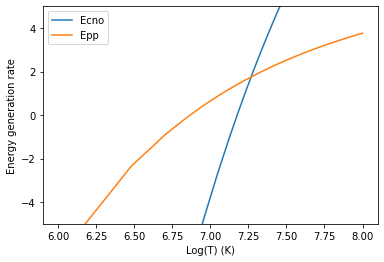

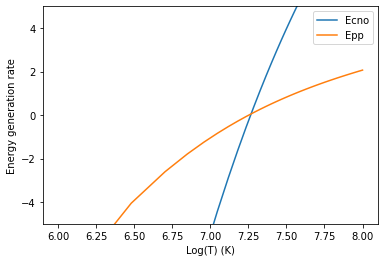

In [20]:
#some left over code that I do not have the heart to delete

Xcno = 0.014
X1 = 0.715

rho_c = [50, 1]

T_array = np.linspace(1e6,1e8, 50) #reasonable range 
for rho_c in rho_c: 
    ecno_list = []
    epp_list = []
    for T in T_array:
        T_9 = T*10**-9
        g14 = 1 - 2.0*T_9 +3.41*T_9**2 - 2.43*T_9**3
        ecno = 8.24e25 *g14 * Xcno*X1 * rho_c * T_9**(-2/3) * np.exp(-15.231*T_9**(-1/3)-(T_9/0.8)**2)
        ecno_list.append(ecno)
        g11 = 1 + 3.82*T_9 +1.51*T_9**2 + 0.144*T_9**3 -0.0144*T_9**4
        epp = 5.14e4 * g11 * rho_c * X1**2 * T_9**(-2/3) *np.exp(-3.381/(T_9**(1/3)))
        epp_list.append(epp)
    ecno_list = np.array(ecno_list)
    epp_list = np.array(epp_list)
    plt.plot(np.log10(T_array),np.log10(ecno_list), label = 'Ecno')
    plt.plot(np.log10(T_array), np.log10(epp_list), label = 'Epp')
    plt.xlabel('Log(T) (K)')
    plt.ylabel('Energy generation rate')
    plt.legend()
    plt.ylim(-5,5)
    plt.show()